# Bernoulli GLM on example code

## Fit GLM-HMM to data from each individual IBL animals.

In [1]:
""" 
IMPORTS
"""
import os
import sys
import autograd.numpy as np

from glm_hmm_utils_dynamax import load_cluster_arr, load_session_fold_lookup, \
    load_animal_list, load_data, create_violation_mask

import jax.numpy as jnp
import jax.random as jr
import matplotlib.pyplot as plt
from dynamax.hidden_markov_model import BernoulliHMM

ModuleNotFoundError: No module named 'jax'

In [2]:
from functools import partial
import jax.random as jr
import jax.numpy as jnp
from jax import vmap
import matplotlib.pyplot as plt
from pprint import pprint

from dynamax.hidden_markov_model import BernoulliHMM
from dynamax.hidden_markov_model import CategoricalRegressionHMM


ModuleNotFoundError: No module named 'jax'

In [3]:
""" 
SOME FUNCTIONS 
"""

def find_permutation(z1, z2):
    K1 = z1.max() + 1
    K2 = z2.max() + 1

    perm = []
    for k1 in range(K1):
        indices = jnp.where(z1 == k1)[0]
        counts = jnp.bincount(z2[indices])
        perm.append(jnp.argmax(counts))

    return jnp.array(perm)

def plot_transition_matrix(transition_matrix):
    plt.imshow(transition_matrix, vmin=0, vmax=1, cmap="Greys")
    plt.xlabel("next state")
    plt.ylabel("current state")
    plt.colorbar()
    plt.show()


def compare_transition_matrix(true_matrix, test_matrix):
    # latexify(width_scale_factor=1, fig_height=1.5)
    figsize = (10, 5)
    if is_latexify_enabled():
        figsize = None
    latexify(width_scale_factor=1, fig_height=1.5)
    fig, axs = plt.subplots(1, 2, figsize=figsize)
    out = axs[0].imshow(true_matrix, vmin=0, vmax=1, cmap="Greys")
    axs[1].imshow(test_matrix, vmin=0, vmax=1, cmap="Greys")
    axs[0].set_title("True Transition Matrix")
    axs[1].set_title("Test Transition Matrix")
    cax = fig.add_axes(
        [
            axs[1].get_position().x1 + 0.07,
            axs[1].get_position().y0,
            0.02,
            axs[1].get_position().y1 - axs[1].get_position().y0,
        ]
    )
    plt.colorbar(out, cax=cax)
    plt.show()


def plot_posterior_states(Ez, states, perm):
    # latexify(width_scale_factor=1, fig_height=1.5)
    figsize = (25, 5)
    if is_latexify_enabled():
        figsize = None
    plt.figure(figsize=figsize)
    plt.imshow(Ez.T[perm], aspect="auto", interpolation="none", cmap="Greys")
    plt.plot(states, label="True State", linewidth=1)
    plt.plot(Ez.T[perm].argmax(axis=0), "--", label="Predicted State", linewidth=1)
    plt.xlabel("time")
    plt.ylabel("latent state")
    plt.legend(bbox_to_anchor=(1, 1))
    plt.title("Predicted vs. Ground Truth Latent State")
    

def softmax(x, class_num, num_timesteps):
    # Initialize probabilities for each outcomes (as many as class_num)
    pi = np.zeros((class_num, num_timesteps))
    for i in range(class_num):
        pi[i] = np.exp(x[:, i]) / np.sum(np.exp(x[:, :]), axis=1)
    return pi

## Parameters

In [4]:
num_states = 2
emission_dim = 1  # How can this be?
D = 1  # data (observations) dimension
C = 2  # number of output types/categories
K = 2
prior_sigma = [2]
transition_alpha = [2]
n_folds = 2
n_iter = 1
N_em_iters = 300  # number of EM iterations

## Design matrix

In [5]:
""" 
DIRECTORIES 
"""
results_dir = '/home/ines/repositories/representation_learning_variability/DATA/Dynamax/'
if not os.path.exists(results_dir):
    os.makedirs(results_dir)

data_dir = '/home/ines/repositories/representation_learning_variability/DATA/GLMHMM/data_for_cluster/'
#data_dir = '/Users/ineslaranjeira/Documents/Repositories/representation_learning_variability/DATA/GLMHMM/data_for_cluster/'
processed_ibl_data_path = data_dir + "data_by_animal/"


OSError: [Errno 45] Operation not supported: '/home/ines'

In [6]:
animal = 'CSHL_001'
animal_file = processed_ibl_data_path + animal + '_processed.npz'
for f, fold in enumerate(range(n_folds)):
    for i, iter in enumerate(range(n_iter)):
        if os.path.exists(animal_file):
            
            session_fold_lookup_table = load_session_fold_lookup(
                processed_ibl_data_path + animal + '_session_fold_lookup.npz')

            inpt, y, session = load_data(animal_file)
            #  append a column of ones to inpt to represent the bias covariate:
            inpt = np.hstack((inpt, np.ones((len(inpt), 1))))
            y = y.astype('int')

            # Identify violations for exclusion:
            violation_idx = np.where(y == -1)[0]
            nonviolation_idx, mask = create_violation_mask(violation_idx,
                                                        inpt.shape[0])

            # TODO: init_param_file = ???

            # create save directory for this initialization/fold combination:
            save_directory = results_dir + animal + '/GLM_HMM_K_' + str(
                K) + '/' + 'fold_' + str(fold) + '/' + '/iter_' + str(iter) + '/'
            if not os.path.exists(save_directory):
                os.makedirs(save_directory)




NameError: name 'processed_ibl_data_path' is not defined

In [1]:



# Sample from all possible actions according to the policy
#sampled_action = np.random.choice(actions, p=pi)


In [2]:
params.transitions.transition_matrix

NameError: name 'params' is not defined

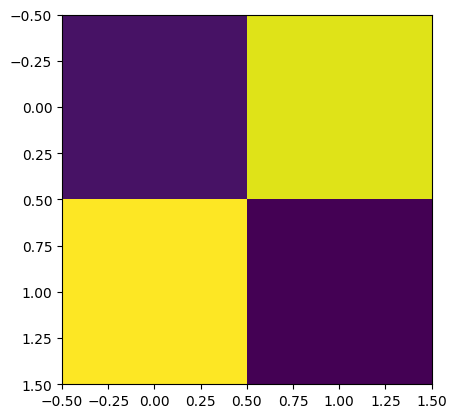

In [202]:
plt.imshow(params.transitions.transition_matrix)

In [209]:
test_hmm = CategoricalRegressionHMM(num_states, num_classes, feature_dim)
params, props = test_hmm.initialize(key=key1)

In [210]:
params

ParamsCategoricalRegressionHMM(initial=ParamsStandardHMMInitialState(probs=Array([0.45964974, 0.5403504 ], dtype=float32)), transitions=ParamsStandardHMMTransitions(transition_matrix=Array([[0.7429111 , 0.2570889 ],
       [0.84045124, 0.15954873]], dtype=float32)), emissions=ParamsCategoricalRegressionHMMEmissions(weights=Array([[[ 0.17949276,  2.6536295 , -0.38317457, -0.3820969 ],
        [ 1.3456706 ,  0.9029578 ,  0.13904482,  1.6301987 ]],

       [[-1.783657  ,  0.1932885 ,  0.66789013, -1.1112872 ],
        [-0.48218977, -1.9499718 , -0.9368517 , -1.4558738 ]]],      dtype=float32), biases=Array([[ 0.6098264 , -0.00407007],
       [-0.31730822, -1.8950071 ]], dtype=float32)))

In [221]:
test_hmm = CategoricalRegressionHMM(num_states, num_classes, feature_dim)
test_hmm.transition_component(concentration=1.1, stickiness=0.0)

TypeError: 'StandardHMMTransitions' object is not callable

## HMM model
#### categoricalRegressionHMM

test log prob:  -317.53345


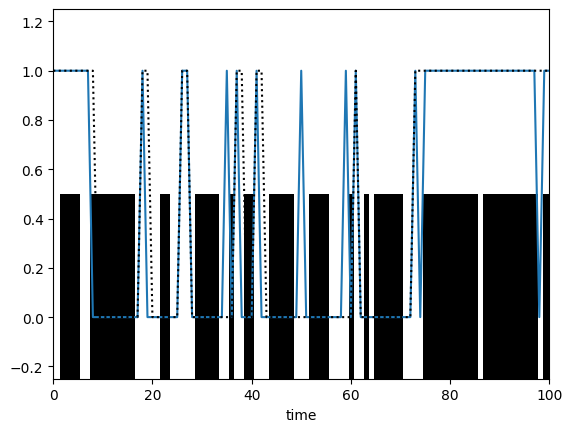

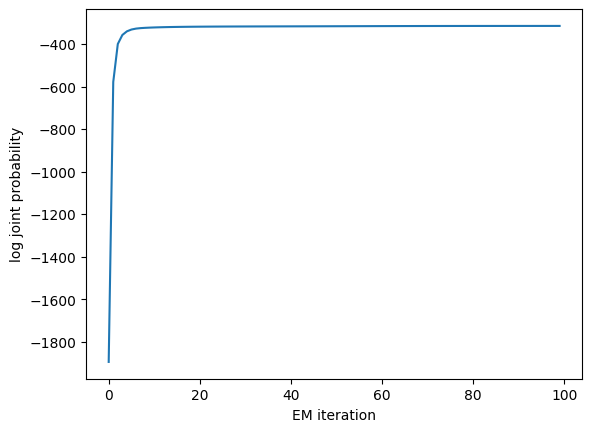

In [224]:

key1, key2, key3, key4 = jr.split(jr.PRNGKey(0), 4)

num_states = 2
num_classes = 2
feature_dim = 4
num_timesteps = 1000
num_iters = 100

inputs = inpt.copy()[0:num_timesteps]
emissions = np.reshape(y, (len(y)))[0:num_timesteps]

# Try fitting it!
test_hmm = CategoricalRegressionHMM(num_states, num_classes, feature_dim, transition_matrix_concentration=10)

params, props = test_hmm.initialize(key=key4)
params, lps = test_hmm.fit_em(params, props, emissions, inputs=inputs, num_iters=num_iters)

# Plot the data and predictions
# Compute the most likely states
most_likely_states = test_hmm.most_likely_states(params, emissions, inputs=inputs)

# Predict the emissions given the true states
As = params.emissions.weights[most_likely_states]
bs = params.emissions.biases[most_likely_states]

x_dot_weights = vmap(lambda x, A, b: A @ x + b)(inputs, As, bs)
y_prob_pred = softmax(x_dot_weights, num_classes, num_timesteps)

predictions = jnp.argmax(y_prob_pred, axis=0)

offsets = 3 * jnp.arange(num_classes)
#plt.imshow(most_likely_states[None, :],
#            extent=(0, num_timesteps, -3, 3 * num_classes),
#            aspect="auto",
#            cmap="Greys",
#            alpha=0.5)
plt.imshow(most_likely_states[None, :],
            aspect="auto", interpolation='none', cmap="Greys")
plt.plot(emissions)
plt.plot(predictions, ':k')
plt.xlim(0, num_timesteps)
plt.ylim(-0.25, 1 + 0.25)
plt.xlabel("time")
plt.xlim(0, num_iters)

plt.figure()
plt.plot(lps)
#plt.axhline(hmm.marginal_log_prob(true_params, emissions, inputs), color='k', ls=':')
plt.xlabel("EM iteration")
plt.ylabel("log joint probability")

#print("true log prob: ", hmm.marginal_log_prob(true_params, emissions, inputs=inputs))
print("test log prob: ", test_hmm.marginal_log_prob(params, emissions, inputs=inputs))

plt.show()

true log prob:  -11143.873
test log prob:  -11127.03


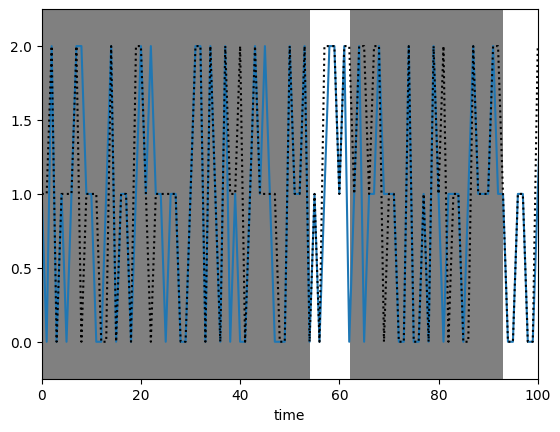

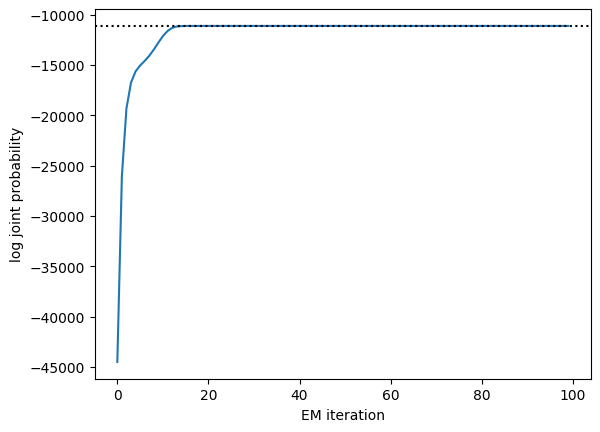

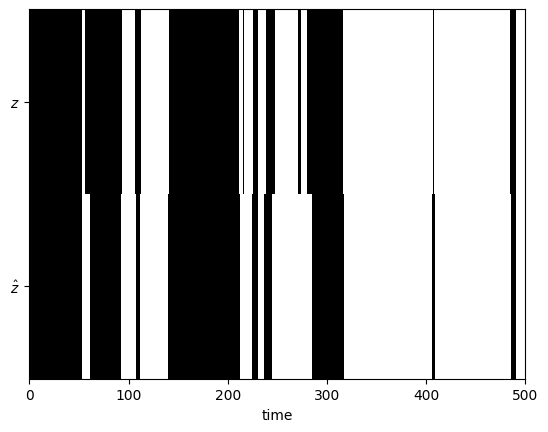

In [193]:
key1, key2, key3, key4 = jr.split(jr.PRNGKey(0), 4)

num_states = 2
num_classes = 3
feature_dim = 10
num_timesteps = 20000

hmm = CategoricalRegressionHMM(num_states, num_classes, feature_dim)
transition_matrix = jnp.array([[0.95, 0.05],
                                [0.05, 0.95]])
true_params, _ = hmm.initialize(key=key1, transition_matrix=transition_matrix)

inputs = jr.normal(key2, (num_timesteps, feature_dim))
states, emissions = hmm.sample(true_params, key3, num_timesteps, inputs=inputs)

# Try fitting it!
test_hmm = CategoricalRegressionHMM(num_states, num_classes, feature_dim)
params, props = test_hmm.initialize(key=key4)
params, lps = test_hmm.fit_em(params, props, emissions, inputs=inputs, num_iters=100)

# Plot the data and predictions
# Compute the most likely states
most_likely_states = test_hmm.most_likely_states(params, emissions, inputs=inputs)

# Predict the emissions given the true states
As = params.emissions.weights[most_likely_states]
bs = params.emissions.biases[most_likely_states]

x_dot_weights = vmap(lambda x, A, b: A @ x + b)(inputs, As, bs)
y_probs = softmax(x_dot_weights, num_classes, num_timesteps)

predictions = jnp.argmax(y_probs, axis=0)
predictions = jnp.argmax(x_dot_weights, axis=1)

offsets = 3 * jnp.arange(num_classes)
plt.imshow(most_likely_states[None, :],
            extent=(0, num_timesteps, -3, 3 * num_classes),
            aspect="auto",
            cmap="Greys",
            alpha=0.5)
plt.plot(emissions)
plt.plot(predictions, ':k')
plt.xlim(0, num_timesteps)
plt.ylim(-0.25, 2.25)
plt.xlabel("time")
plt.xlim(0, 100)

plt.figure()
plt.plot(lps)
plt.axhline(hmm.marginal_log_prob(true_params, emissions, inputs), color='k', ls=':')
plt.xlabel("EM iteration")
plt.ylabel("log joint probability")

plt.figure()
plt.imshow(jnp.vstack((states[None, :], most_likely_states[None, :])),
            aspect="auto", interpolation='none', cmap="Greys")
plt.yticks([0.0, 1.0], ["$z$", "$\hat{z}$"])
plt.xlabel("time")
plt.xlim(0, 500)


print("true log prob: ", hmm.marginal_log_prob(true_params, emissions, inputs=inputs))
print("test log prob: ", test_hmm.marginal_log_prob(params, emissions, inputs=inputs))

plt.show()

test log prob:  -67.01058


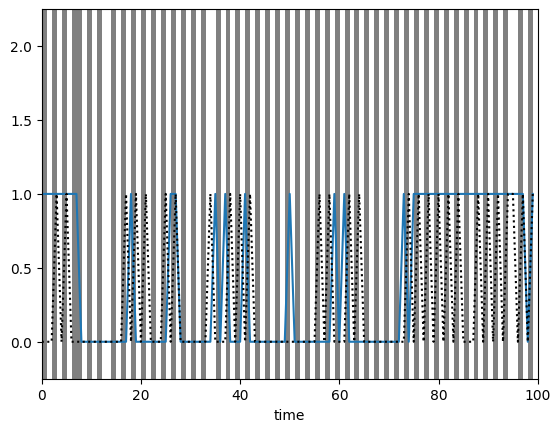

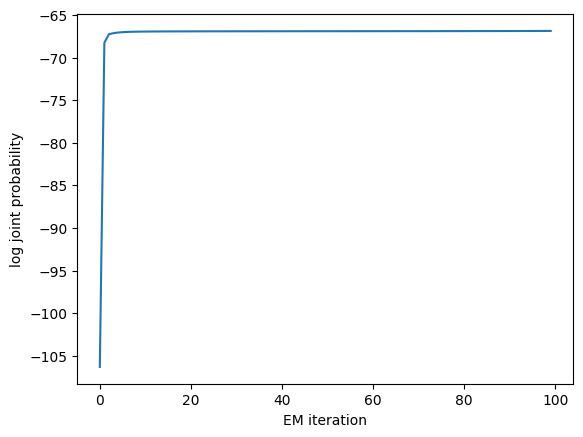

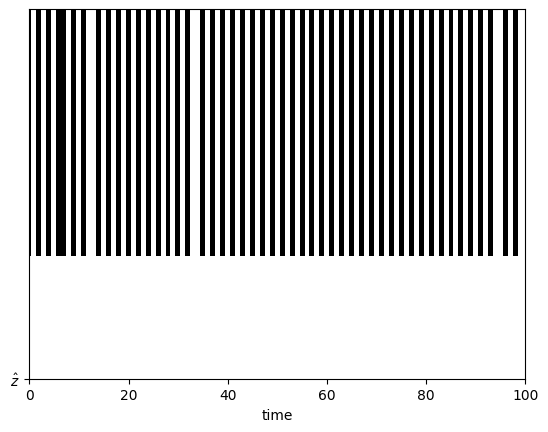

In [96]:
key1, key2, key3, key4 = jr.split(jr.PRNGKey(0), 4)

num_states = 2
num_classes = 2
feature_dim = 2
num_timesteps = 100

#hmm = CategoricalRegressionHMM(num_states, num_classes, feature_dim)
#transition_matrix = jnp.array([[0.95, 0.05],
#                                [0.05, 0.95]])
#true_params, _ = hmm.initialize(key=key1, transition_matrix=transition_matrix)

#inputs = jr.normal(key2, (num_timesteps, feature_dim))
inputs = inpt[:, 2:4].copy()[0:num_timesteps]
#states, emissions = hmm.sample(true_params, key3, num_timesteps, inputs=inputs)
emissions = np.reshape(y, (len(y)))[0:num_timesteps]

# Try fitting it!
test_hmm = CategoricalRegressionHMM(num_states, num_classes, feature_dim)
params, props = test_hmm.initialize(key=key4)
params, lps = test_hmm.fit_em(params, props, emissions, inputs=inputs, num_iters=100)

# Plot the data and predictions
# Compute the most likely states
most_likely_states = test_hmm.most_likely_states(params, emissions, inputs=inputs)

# Predict the emissions given the true states
As = params.emissions.weights[most_likely_states]
bs = params.emissions.biases[most_likely_states]
predictions = vmap(lambda x, A, b: A @ x + b)(inputs, As, bs)
predictions = jnp.argmax(predictions, axis=1)

offsets = 3 * jnp.arange(num_classes)
plt.imshow(most_likely_states[None, :],
            extent=(0, num_timesteps, -3, 3 * num_classes),
            aspect="auto",
            cmap="Greys",
            alpha=0.5)
plt.plot(emissions)
plt.plot(predictions, ':k')
plt.xlim(0, num_timesteps)
plt.ylim(-0.25, 2.25)
plt.xlabel("time")
plt.xlim(0, 100)

plt.figure()
plt.plot(lps)
#plt.axhline(hmm.marginal_log_prob(true_params, emissions, inputs), color='k', ls=':')
plt.xlabel("EM iteration")
plt.ylabel("log joint probability")

plt.figure()
plt.imshow(most_likely_states[None, :],
            aspect="auto", interpolation='none', cmap="Greys")
plt.yticks([1.0], ["$\hat{z}$"])
plt.xlabel("time")
plt.xlim(0, len(emissions))


#print("true log prob: ", hmm.marginal_log_prob(true_params, emissions, inputs=inputs))
print("test log prob: ", test_hmm.marginal_log_prob(params, emissions, inputs=inputs))

plt.show()

Text(0, 0.5, 'log likelihood')

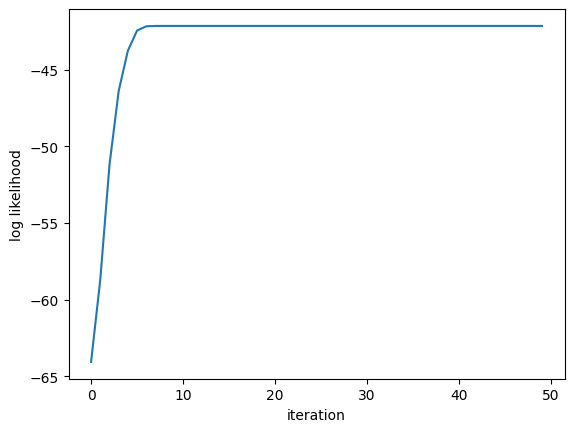

In [79]:
# Plot the log probabilities
plt.plot(lps)
plt.xlabel("iteration")
plt.ylabel("log likelihood")

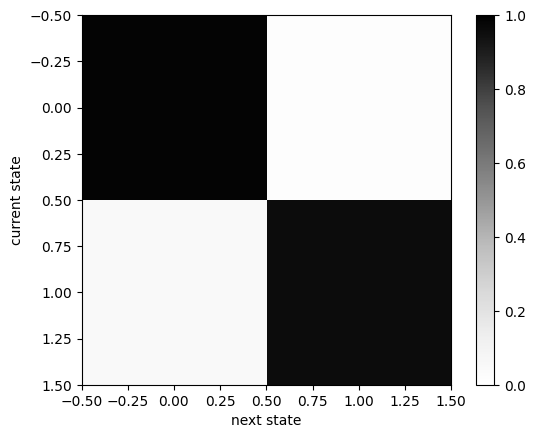

Array([[0.9819441 , 0.01805598],
       [0.04320101, 0.956799  ]], dtype=float32)

In [80]:
plot_transition_matrix(params[1].transition_matrix)
params[1].transition_matrix

In [81]:
# Posterior distribution
posterior = test_hmm.smoother(params, y[0:100])
Ez = posterior.smoothed_probs

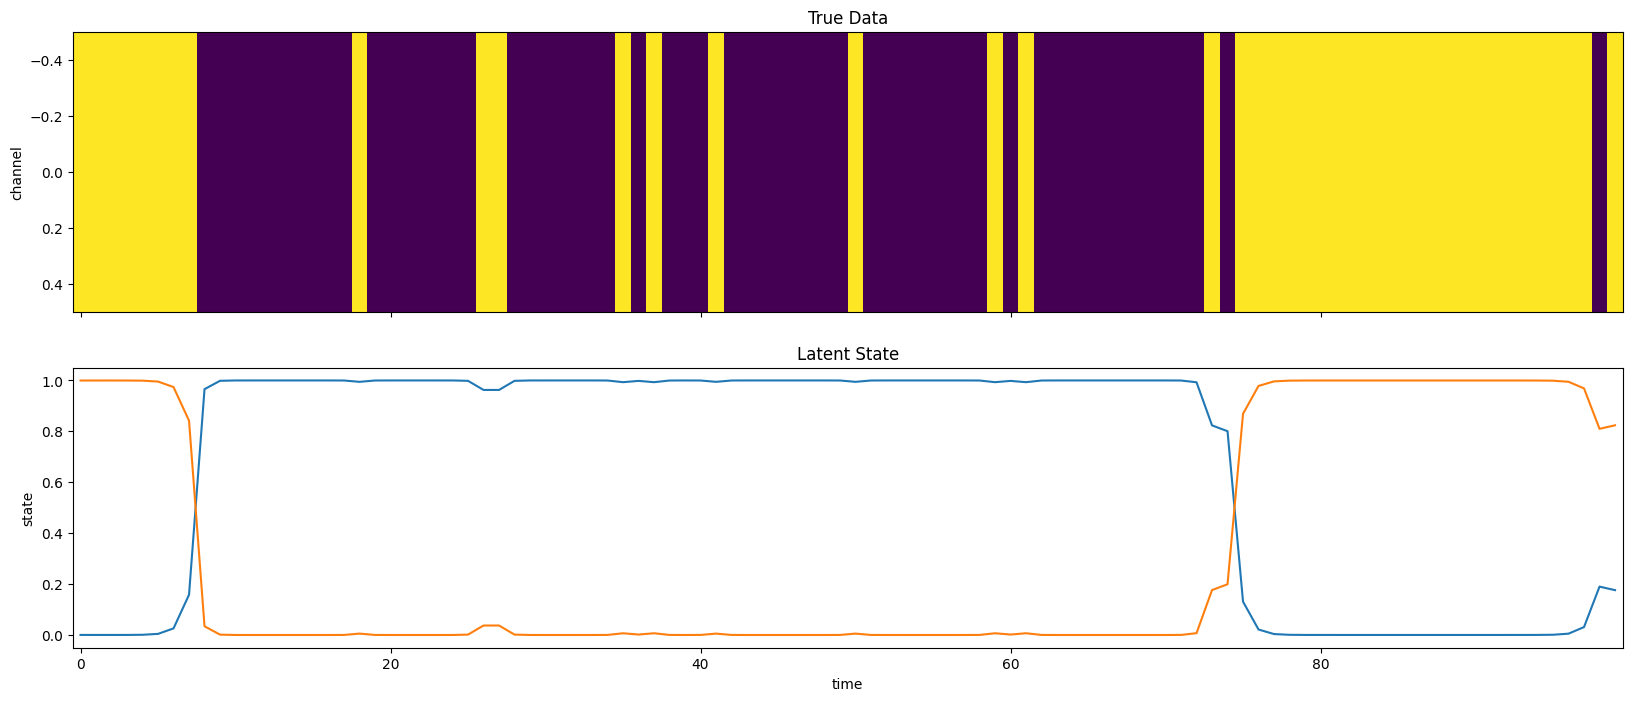

In [83]:
fig, axs = plt.subplots(2, 1, sharex=True, figsize=(20, 8))
axs[0].imshow(y[0:100].T, aspect="auto", interpolation="none")
axs[0].set_ylabel("channel")
axs[0].set_title("True Data")
axs[1].plot(Ez)
axs[1].set_title("Latent State")
axs[1].set_xlabel("time")
axs[1].set_ylabel("state")
plt.show()



In [84]:
y[0:100]

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
    

In [38]:

# Posterior distribution
posterior = test_hmm.smoother(params, y)
Ez = posterior.smoothed_probs
perm = find_permutation(true_states, jnp.argmax(Ez, axis=-1))
plot_posterior_states(Ez, true_states, perm)



NameError: name 'emissions' is not defined

In [ ]:


# For the first few trials, let's see how good our predicted states are
for trial_idx in range(3):
    print("=" * 5, f"Trial: {trial_idx}", "=" * 5)
    posterior = test_hmm.smoother(params, y[trial_idx])
    Ez = posterior.smoothed_probs
    states = all_true_states[trial_idx]
    perm = find_permutation(states, jnp.argmax(Ez, axis=-1))
    plot_posterior_states(Ez, states, perm)



In [12]:
key = jr.PRNGKey(0)
em_params, em_param_props = hmm.initialize(key)
em_params, log_probs = hmm.fit_em(em_params, 
                                  em_param_props, 
                                  batch_emissions, 
                                  num_iters=400)


NameError: name 'hmm' is not defined